In [1]:
import os
import pandas as pd
import re
i = 0
filepaths = []
# "C:/Users/janja/Desktop/firstData"
for root, dirs, files in os.walk("C:/Users/janja/OneDrive/Pulpit/DaneMGR", topdown=True):
    for name in dirs:
        if (bool(re.findall('\d$', name)) == False):
            Path = (root + '/' + name)
            filepaths.append(re.sub('DaneMGR\\\\', 'DaneMGR/', Path))

In [2]:
from os import walk
filenameList = []
fullPath = []
for Path in filepaths:
    for (dirpath, dirnames, filenames) in walk(Path):
        #print(filenames)
        for name in filenames:
            if (bool(re.findall('fast_Unknown', name)) == True) and name not in filenameList:
                NewName = re.sub('._CsvLog', 'CsvLog', name)
                filenameList.append(NewName)
                fullPath.append(Path + '/' + NewName)

In [3]:
'''
print(filepaths)
print('\n')
print(filenameList)
print('\n')
print(fullPath)
'''

"\nprint(filepaths)\nprint('\n')\nprint(filenameList)\nprint('\n')\nprint(fullPath)\n"

In [4]:
'''
df = pd.DataFrame()
i = 0
for path in fullPath:
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8')
    print(df_local)
    match = re.findall("/B/Csv",path)
    boolean = bool(match)
    print(boolean)
    if boolean == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    # print(df_local)
    i += 1
    print(i)
    df = df.append(df_local)
'''



'\ndf = pd.DataFrame()\ni = 0\nfor path in fullPath:\n    df_local = pd.read_csv(path, sep = \',\', encoding = \'UTF-8\')\n    print(df_local)\n    match = re.findall("/B/Csv",path)\n    boolean = bool(match)\n    print(boolean)\n    if boolean == True:\n        df_local[\'position\'] = 1\n    else:\n        df_local[\'position\'] = 0\n    # print(df_local)\n    i += 1\n    print(i)\n    df = df.append(df_local)\n'

In [5]:
T = 10000 # describes which rows multiplied by n should be taken into the dataset
fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
df = pd.DataFrame()
for path in fullPath:
    print(path)
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8', usecols=fields)
    df_local = df_local[df_local.index % T == 0] #Set to 2000 as 1 second is 20 observations
    match = re.findall("/B/Csv",path)
    if bool(match) == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    neo = re.findall('\/([\d]{1,2})\/', path)
    df_local.insert(0,'neonate', str(neo))
    print(df_local)
    df = df.append(df_local)

C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/B/CsvLogBase_2022-01-15_191202.371_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['1']                                 -0.155   
10000     ['1']                                 -1.462   
20000     ['1']                                 -0.391   
30000     ['1']                                 -0.655   
40000     ['1']                                 -0.468   
...         ...                                    ...   
2940000   ['1']                                    NaN   
2950000   ['1']                                    NaN   
2960000   ['1']                                    NaN   
2970000   ['1']                                    NaN   
2980000   ['1']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -45.0         1  
10000                                175.0         1  
20000                                239.0   

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['12']                                  0.290   
10000    ['12']                                 -0.176   
20000    ['12']                                  0.992   
30000    ['12']                                  0.569   
40000    ['12']                                 -0.289   
...         ...                                    ...   
2220000  ['12']                                    NaN   
2230000  ['12']                                    NaN   
2240000  ['12']                                    NaN   
2250000  ['12']                                    NaN   
2260000  ['12']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     66.0         1  
10000                                118.0         1  
20000                                -16.0         1  
30000                                741.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['15']                                 -0.286   
10000    ['15']                                 -1.699   
20000    ['15']                                 -0.357   
30000    ['15']                                  0.315   
40000    ['15']                                 -0.371   
...         ...                                    ...   
2170000  ['15']                                    NaN   
2180000  ['15']                                    NaN   
2190000  ['15']                                    NaN   
2200000  ['15']                                    NaN   
2210000  ['15']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    181.0         1  
10000                                316.0         1  
20000                               -212.0         1  
30000                                 69.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['18']                                 -0.930   
10000    ['18']                                 -0.056   
20000    ['18']                                 -0.317   
30000    ['18']                                 -0.345   
40000    ['18']                                  0.632   
...         ...                                    ...   
3030000  ['18']                                    NaN   
3040000  ['18']                                    NaN   
3050000  ['18']                                    NaN   
3060000  ['18']                                    NaN   
3070000  ['18']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -41.0         1  
10000                                 70.0         1  
20000                                 76.0         1  
30000                                 -4.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['20']                                  0.228   
10000    ['20']                                 -0.093   
20000    ['20']                                  0.583   
30000    ['20']                                 -1.068   
40000    ['20']                                  0.091   
...         ...                                    ...   
1750000  ['20']                                    NaN   
1760000  ['20']                                    NaN   
1770000  ['20']                                    NaN   
1780000  ['20']                                    NaN   
1790000  ['20']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     32.0         1  
10000                                -14.0         1  
20000                               -757.0         1  
30000                                221.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['23']                                    NaN   
10000    ['23']                                 -0.447   
20000    ['23']                                  0.213   
30000    ['23']                                  0.084   
40000    ['23']                                  0.175   
...         ...                                    ...   
3000000  ['23']                                    NaN   
3010000  ['23']                                    NaN   
3020000  ['23']                                    NaN   
3030000  ['23']                                    NaN   
3040000  ['23']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                      NaN         1  
10000                               -351.0         1  
20000                               -109.0         1  
30000                                 96.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['26']                                  0.155   
10000    ['26']                                 -0.130   
20000    ['26']                                  0.447   
30000    ['26']                                 -0.436   
40000    ['26']                                 -0.061   
...         ...                                    ...   
2080000  ['26']                                    NaN   
2090000  ['26']                                    NaN   
2100000  ['26']                                    NaN   
2110000  ['26']                                    NaN   
2120000  ['26']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -56.0         1  
10000                                -60.0         1  
20000                                119.0         1  
30000                                 43.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['29']                                  0.423   
10000    ['29']                                 -0.025   
20000    ['29']                                  0.670   
30000    ['29']                                  2.462   
40000    ['29']                                  0.728   
...         ...                                    ...   
2840000  ['29']                                    NaN   
2850000  ['29']                                    NaN   
2860000  ['29']                                    NaN   
2870000  ['29']                                    NaN   
2880000  ['29']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                      7.0         1  
10000                                 68.0         1  
20000                                 63.0         1  
30000                              -3132.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['31']                                  0.085   
10000    ['31']                                  0.119   
20000    ['31']                                  0.207   
30000    ['31']                                  0.068   
40000    ['31']                                 -0.388   
...         ...                                    ...   
3020000  ['31']                                    NaN   
3030000  ['31']                                    NaN   
3040000  ['31']                                    NaN   
3050000  ['31']                                    NaN   
3060000  ['31']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     14.0         1  
10000                                 82.0         1  
20000                                 66.0         1  
30000                                  8.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['34']                                 -0.023   
10000    ['34']                                 -0.257   
20000    ['34']                                 -0.420   
30000    ['34']                                 -0.316   
40000    ['34']                                 -0.762   
...         ...                                    ...   
2840000  ['34']                                    NaN   
2850000  ['34']                                    NaN   
2860000  ['34']                                    NaN   
2870000  ['34']                                    NaN   
2880000  ['34']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    130.0         1  
10000                               8191.0         1  
20000                                -38.0         1  
30000                                 -8.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['37']                                 -0.681   
10000    ['37']                                  0.050   
20000    ['37']                                  0.346   
30000    ['37']                                  0.232   
40000    ['37']                                 -0.493   
...         ...                                    ...   
2840000  ['37']                                    NaN   
2850000  ['37']                                    NaN   
2860000  ['37']                                    NaN   
2870000  ['37']                                    NaN   
2880000  ['37']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                   -406.0         1  
10000                                -33.0         1  
20000                                698.0         1  
30000                              -2415.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['4']                                  0.983   
10000     ['4']                                  0.115   
20000     ['4']                                  0.066   
30000     ['4']                                  0.213   
40000     ['4']                                  0.858   
...         ...                                    ...   
3020000   ['4']                                    NaN   
3030000   ['4']                                    NaN   
3040000   ['4']                                    NaN   
3050000   ['4']                                    NaN   
3060000   ['4']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     24.0         1  
10000                                174.0         1  
20000                                -59.0         1  
30000                                -11.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['42']                                  0.051   
10000    ['42']                                 -0.378   
20000    ['42']                                  0.266   
30000    ['42']                                  0.222   
40000    ['42']                                  0.170   
...         ...                                    ...   
2850000  ['42']                                    NaN   
2860000  ['42']                                    NaN   
2870000  ['42']                                    NaN   
2880000  ['42']                                    NaN   
2890000  ['42']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                   -309.0         1  
10000                                872.0         1  
20000                                261.0         1  
30000                                145.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['45']                                 -0.062   
10000    ['45']                                 -1.249   
20000    ['45']                                  3.085   
30000    ['45']                                  0.759   
40000    ['45']                                 -0.175   
...         ...                                    ...   
3040000  ['45']                                    NaN   
3050000  ['45']                                    NaN   
3060000  ['45']                                    NaN   
3070000  ['45']                                    NaN   
3080000  ['45']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                   3247.0         1  
10000                               -395.0         1  
20000                                996.0         1  
30000                                -88.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['49']                                 -0.580   
10000    ['49']                                 -0.643   
20000    ['49']                                 -0.929   
30000    ['49']                                  0.385   
40000    ['49']                                  8.191   
...         ...                                    ...   
2550000  ['49']                                    NaN   
2560000  ['49']                                    NaN   
2570000  ['49']                                    NaN   
2580000  ['49']                                    NaN   
2590000  ['49']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    518.0         1  
10000                                -18.0         1  
20000                               -161.0         1  
30000                                -91.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['6']                                 -0.349   
10000     ['6']                                  0.356   
20000     ['6']                                  0.320   
30000     ['6']                                 -3.672   
40000     ['6']                                 -0.646   
...         ...                                    ...   
1890000   ['6']                                  0.644   
1900000   ['6']                                  0.038   
1910000   ['6']                                  0.049   
1920000   ['6']                                  0.525   
1930000   ['6']                                 -0.143   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    178.0         1  
10000                                -42.0         1  
20000                                150.0         1  
30000                               -493.0         1  
40000                       

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['9']                                  1.299   
10000     ['9']                                  2.263   
20000     ['9']                                  1.399   
30000     ['9']                                  1.241   
40000     ['9']                                  0.554   
...         ...                                    ...   
1890000   ['9']                                    NaN   
1900000   ['9']                                    NaN   
1910000   ['9']                                    NaN   
1920000   ['9']                                    NaN   
1930000   ['9']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    146.0         1  
10000                                 26.0         1  
20000                                 71.0         1  
30000                                 18.0         1  
40000                       

In [6]:
#df

In [7]:
#df_Repaired = df.rename({'Infinity|ECG.ECG_LEAD_I [MICROVOLT]': 'ECG.ECG_LEAD_I[MICROVOLT]', 'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)#.dropna()
#FinalData = df_Repaired[['ECG.ECG_LEAD_I[MICROVOLT]', 'RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]']].copy()
#State = df_Repaired[['position']].copy()
df_Repaired = df.rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
FinalData = df_Repaired[['neonate','RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]','position']].dropna(axis = 0, thresh = 3).copy()
State = FinalData[['position']].copy()
Neonate = FinalData[['neonate']].copy()
FinalData.drop('position', axis=1, inplace=True)
FinalData.drop('neonate', axis=1, inplace=True)

In [8]:
FinalData.isna().sum()

RESP.ONLY_ONE_IN_GROUP[OHM]    3777
SPO2.SPO2_PULSE[COUNTS]          18
dtype: int64

# Interpolation of missing values

In [9]:
FinalData = FinalData.interpolate()

In [10]:
FinalData.isna().sum()

RESP.ONLY_ONE_IN_GROUP[OHM]    0
SPO2.SPO2_PULSE[COUNTS]        0
dtype: int64

In [11]:
FinalData.dtypes.value_counts()

float64    2
dtype: int64

In [12]:
FinalData.describe()

,RESP.ONLY_ONE_IN_GROUP[OHM],SPO2.SPO2_PULSE[COUNTS]
count,15403.000000,15403.000000
mean,-0.040997,10.129683
std,1.140190,608.579525
min,-8.192000,-8192.000000
25%,-0.286905,-119.000000
50%,-0.012000,0.000000
75%,0.280000,120.000000
max,8.191000,8191.000000


In [13]:
#FinalData.plot()

In [14]:
#FinalData.groupby('neonate')['RESP.ONLY_ONE_IN_GROUP[OHM]'].describe()

In [15]:
#FinalData.groupby('neonate')['SPO2.SPO2_PULSE[COUNTS]'].describe()

In [16]:
#State

In [17]:
#State.describe()

In [18]:
#Neonate

In [19]:
#import pandas as pd
#'C:/Users/janja/Desktop/DaneMGR/21/B', 'C:/Users/janja/Desktop/DaneMGR/21/R'
#fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
#df_local = pd.read_csv('C:/Users/janja/Desktop/DaneMGR/21/B/CsvLogBase_2022-06-08_124008.050_fast_Unknown.csv', sep = ',', encoding = 'UTF-8', usecols=fields)

In [20]:
#df_local

In [21]:
#!pip install sweetviz

# Visualization of the chosen columns

                                             |                                             | [  0%]   00:00 ->…


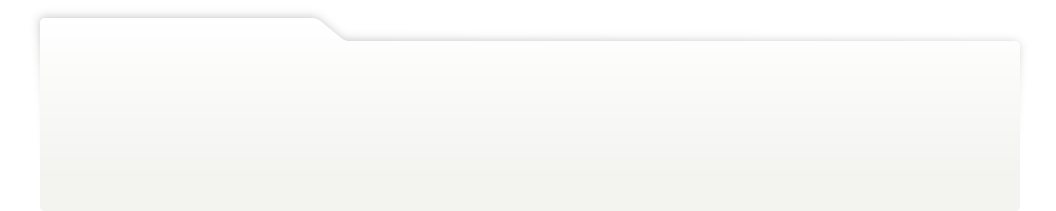
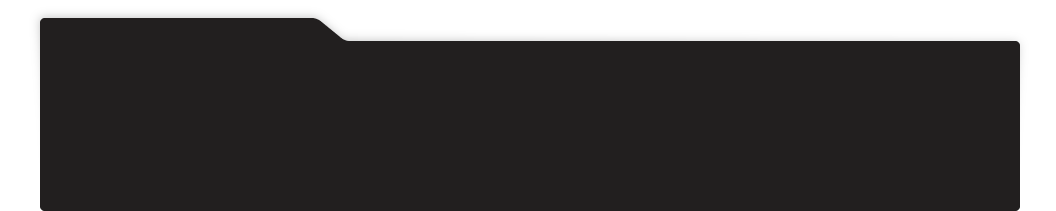
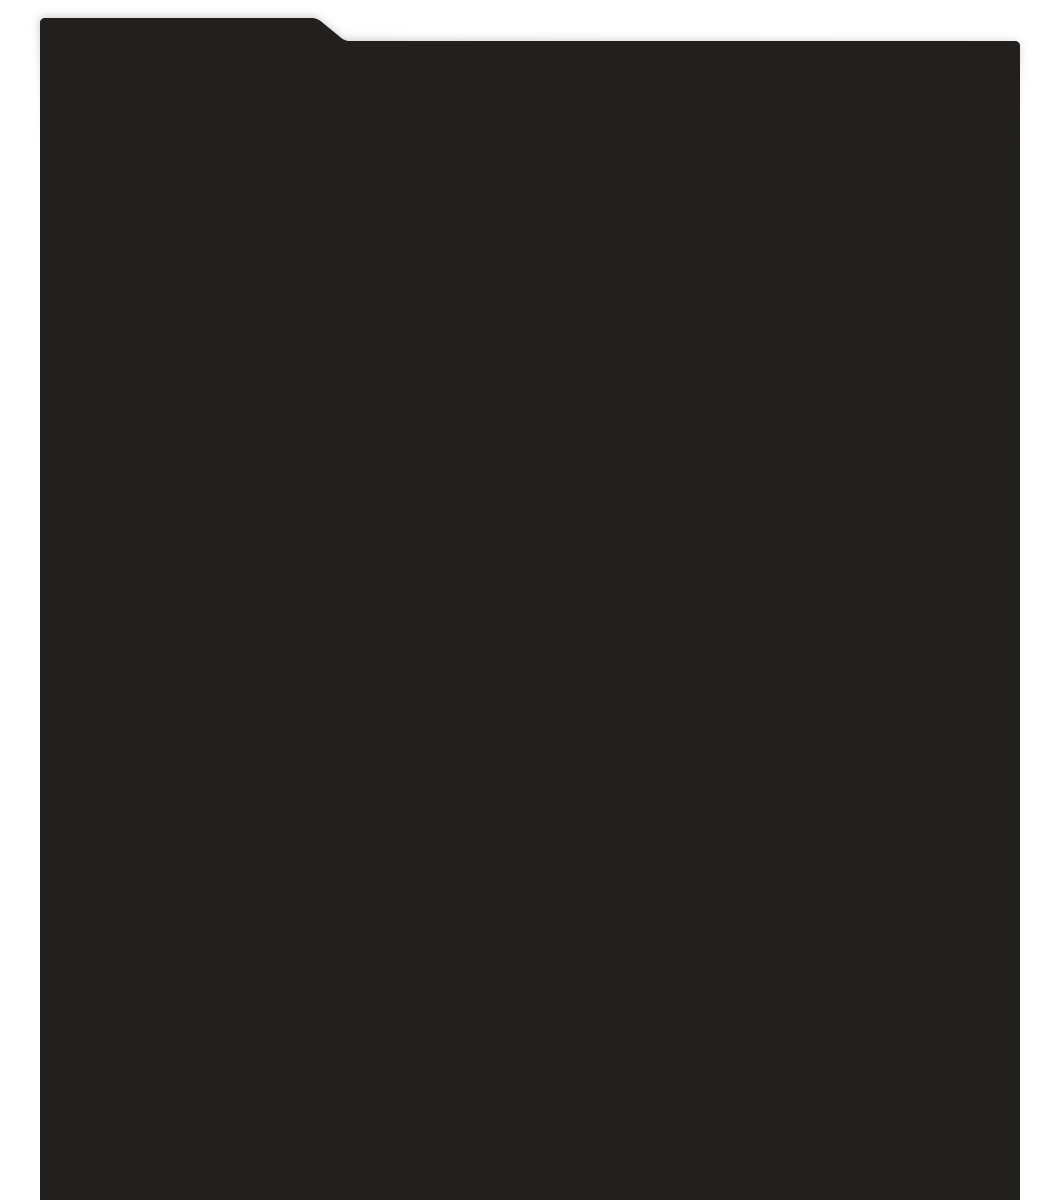
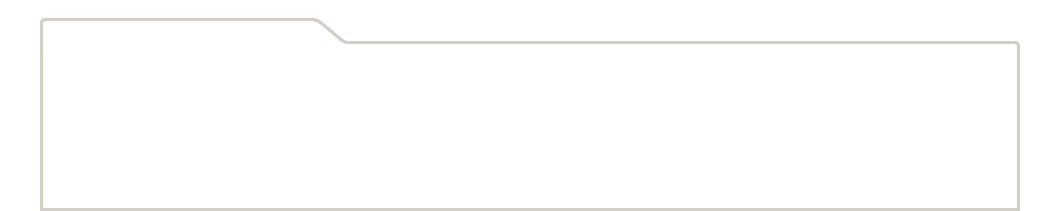
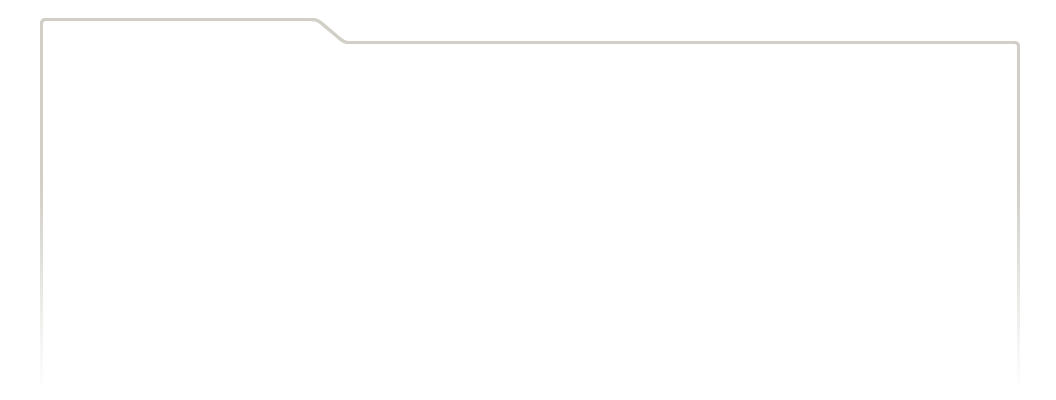
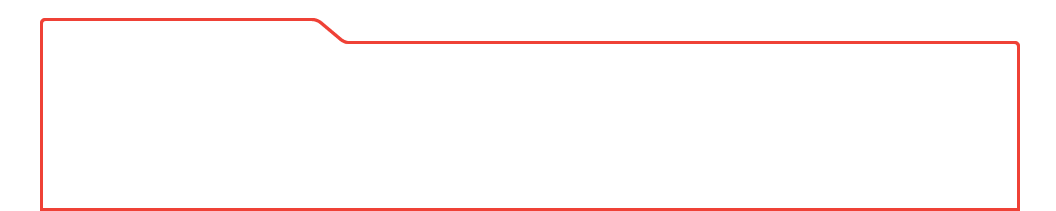
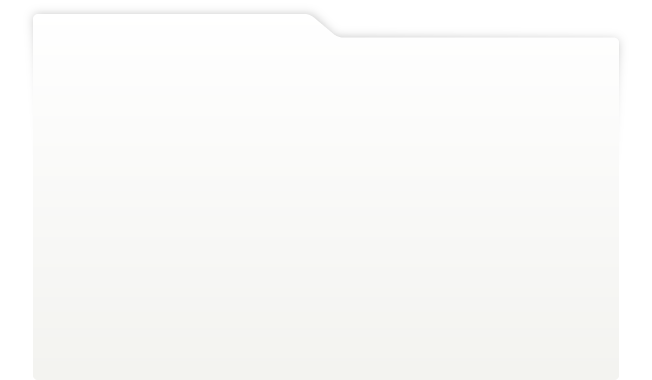
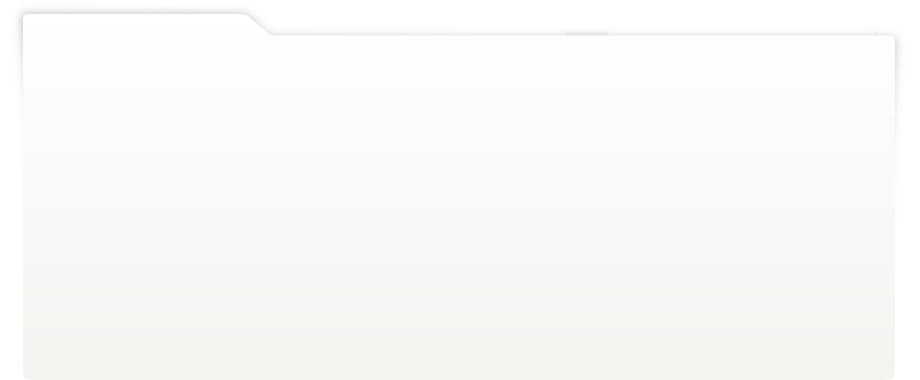
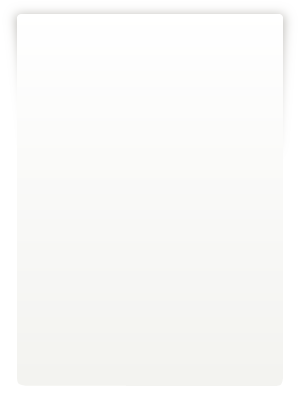
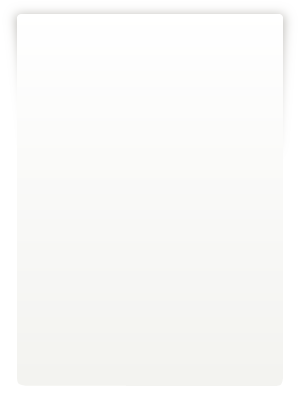
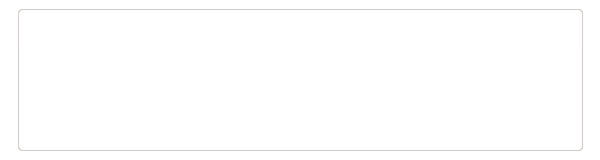
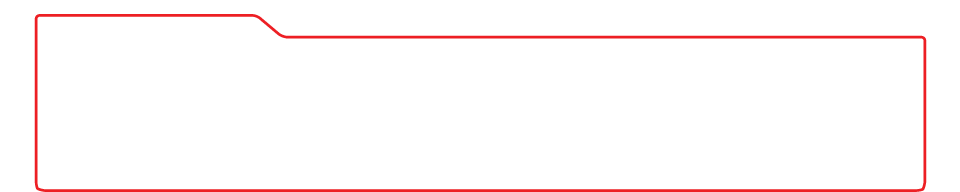
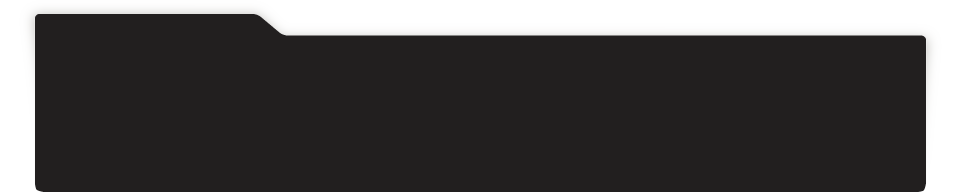
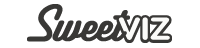
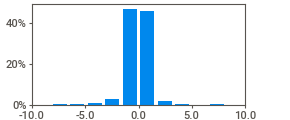
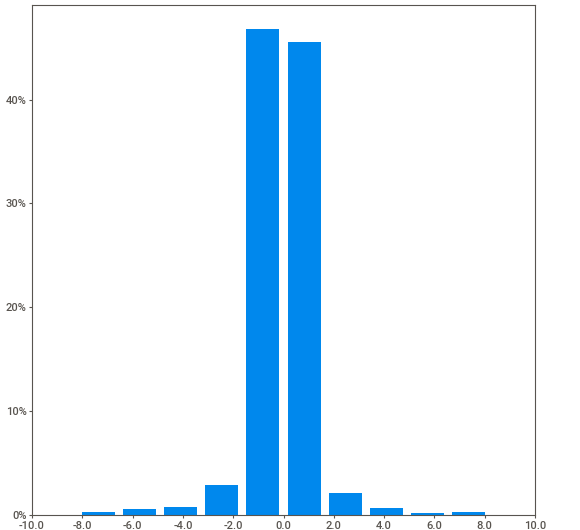
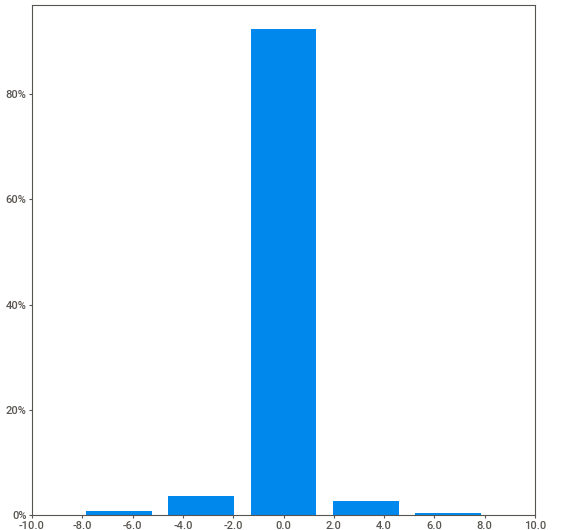
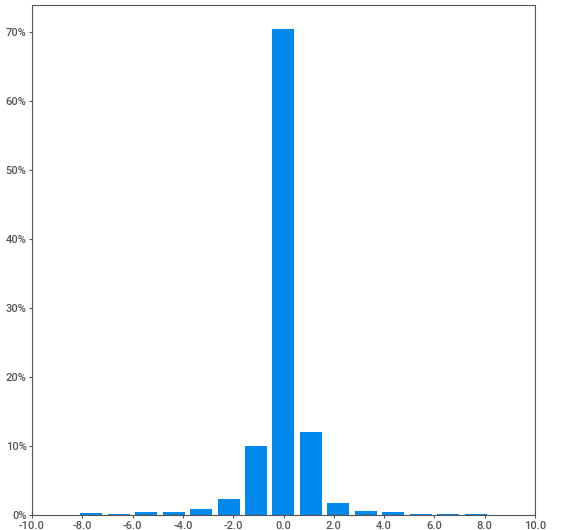
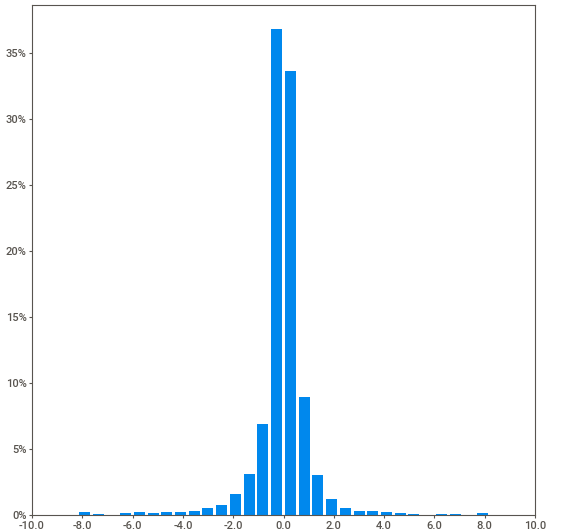
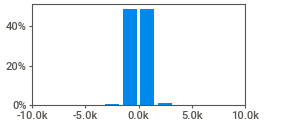
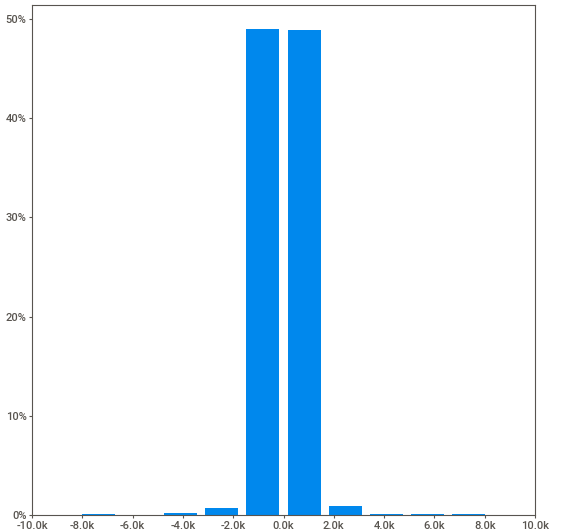
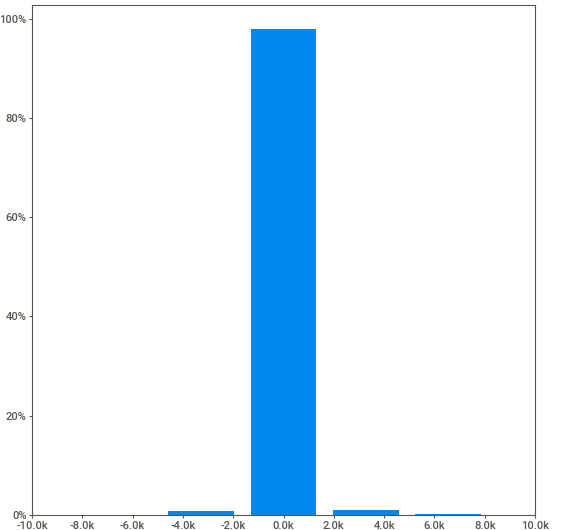
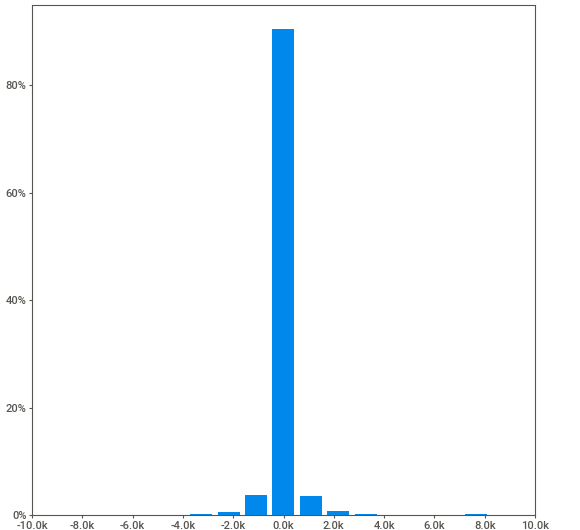
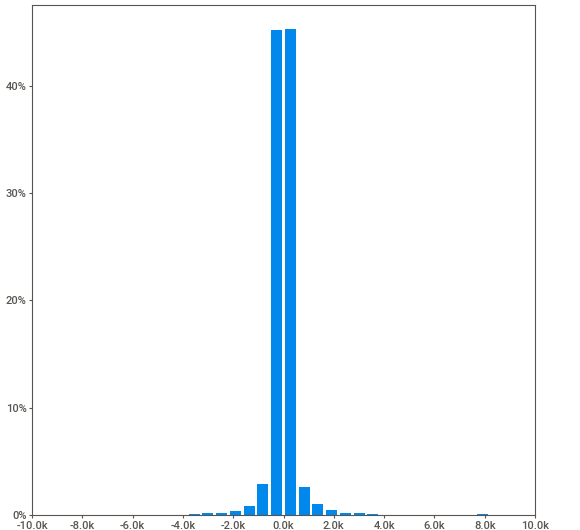
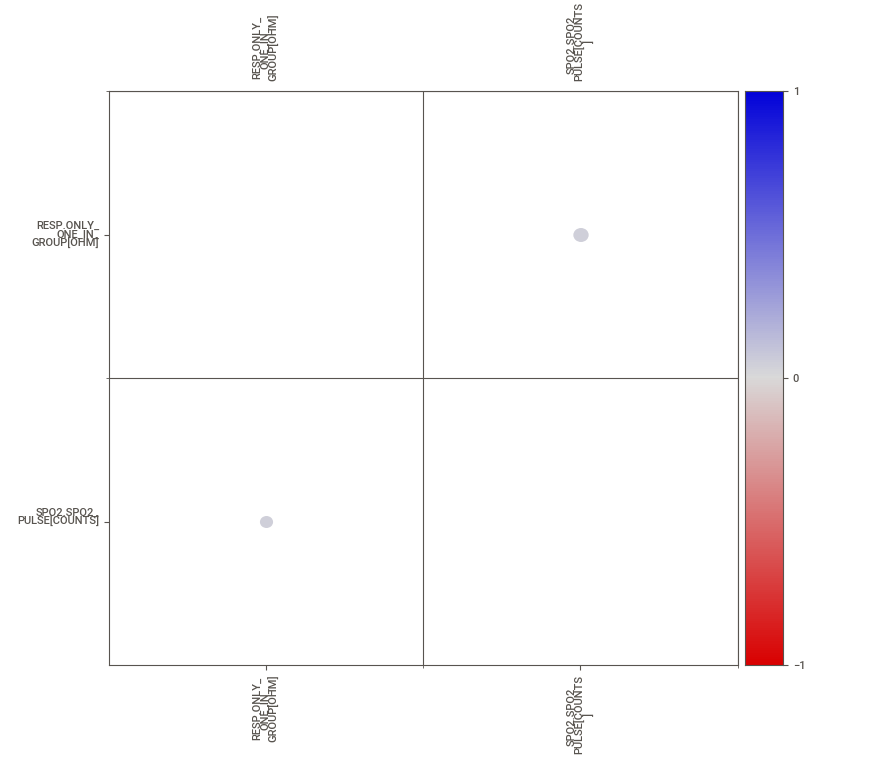
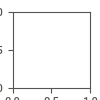

In [22]:
import sweetviz as sv
orig_data_report = sv.analyze(FinalData, pairwise_analysis = 'on')
orig_data_report.show_notebook()

# Data segmentation

In [23]:
import math
import numpy as np
np_data = FinalData.to_numpy()
labels = State.to_numpy()
labels.astype('int')
nb_timestamps, nb_sensors = np_data.shape
window_size = 100 # Size of the data segments, earlier there was the value of 60
timestamp_idx = 0 # Index along the timestamp dimension
segment_idx = 0 # Index for the segment dimension


nb_segments = int(math.floor(nb_timestamps/window_size))
print('Starting segmentation with a window size of %d resulting in %d segments ...' % (window_size,nb_segments))
data_to_save = np.zeros((nb_segments,window_size,nb_sensors),dtype=np.float32)
labels_to_save = np.zeros(nb_segments,dtype=int)

while segment_idx < nb_segments:
    data_to_save[segment_idx] = np_data[timestamp_idx:timestamp_idx+window_size,:]
    # Check the majority label ocurring in the considered window
    current_labels = labels[timestamp_idx:timestamp_idx+window_size]
    values, counts = np.unique(current_labels, return_counts=True)
    labels_to_save[segment_idx] = values[np.argmax(counts)]
    timestamp_idx += window_size
    segment_idx += 1

Starting segmentation with a window size of 100 resulting in 154 segments ...


In [24]:
data_to_save.shape[1]

100

In [25]:
data_to_save.shape

(154, 100, 2)

In [26]:
labels_to_save.shape

(154,)

In [27]:
chunk_size = data_to_save.shape[1]
chunk_size

100

In [28]:
#old
'''
F = 200 # Data frequency of 200HZ
labels = []
def extract_features(data_to_save, chunk_size):
    num_chunks = data_to_save.shape[0]//chunk_size
    num_features = 6
    num_sensors = data_to_save.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    for i in range(num_chunks):
        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        max_val = np.max(chunk, axis=(0, 1))
        #arg_max = np.argmax(chunk, axis=(0, 1))
        sum_val = np.sum(chunk, axis=(0, 1))/F
        features[i,:] = np.hstack([mean, median, std, min_val, max_val, sum_val]).reshape(1, num_features*num_sensors)
        labels[i] = labels_to_save[i]
    #features = features.reshape(num_chunks, num_features, num_sensors)
    return features
'''

'\nF = 200 # Data frequency of 200HZ\nlabels = []\ndef extract_features(data_to_save, chunk_size):\n    num_chunks = data_to_save.shape[0]//chunk_size\n    num_features = 6\n    num_sensors = data_to_save.shape[2]\n    features = np.zeros((num_chunks, num_features*num_sensors))\n    for i in range(num_chunks):\n        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]\n        mean = np.mean(chunk, axis=(0, 1))\n        median = np.median(chunk, axis=(0, 1))\n        std = np.std(chunk, axis=(0, 1))\n        min_val = np.min(chunk, axis=(0, 1))\n        max_val = np.max(chunk, axis=(0, 1))\n        #arg_max = np.argmax(chunk, axis=(0, 1))\n        sum_val = np.sum(chunk, axis=(0, 1))/F\n        features[i,:] = np.hstack([mean, median, std, min_val, max_val, sum_val]).reshape(1, num_features*num_sensors)\n        labels[i] = labels_to_save[i]\n    #features = features.reshape(num_chunks, num_features, num_sensors)\n    return features\n'

In [29]:
#labels = np.array(labels)

In [30]:
#new_array = extract_features(data_to_save, 10)

In [31]:
from numba import cuda

In [32]:
y = 2
x = [2,4,6,8,12]
x = np.array(x)
x = x/y
print(x)

[1. 2. 3. 4. 6.]


# Feature extraction

In [33]:
'''
def extract_features(data_to_save, labels_to_save, chunk_size=data_to_save.shape[1]):
    freq = 100 # Data frequency of 200HZ
    num_chunks = data_to_save.shape[0]//chunk_size
    num_features = 7
    num_sensors = data_to_save.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    labels = np.zeros((num_chunks,))
    for i in range(num_chunks):
        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        max_val = np.max(chunk, axis=(0, 1))
        sum_val = np.sum(chunk, axis=(0, 1))/freq
        # Perform FFT on the chunk of data
        fft_sums = []
        argmax_list = []
        argmax_fft = []
        for j in range(num_sensors):
            fft_vals = np.fft.fft(chunk[:, j, :])
            fft_sum = np.sum(np.abs(fft_vals))
            fft_sums.append(fft_sum)
            argmax = np.argmax(np.abs(fft_vals), axis=0)
            argmax_list.append(argmax)
        argmax_fft = np.fft.fftfreq(chunk_size//freq, 1/freq)[argmax_list]
        fft_sums = np.array(fft_sums)/freq
        features[i,:] = np.concatenate([mean, median, std, min_val, max_val, sum_val, fft_sums, argmax_fft])
        labels[i] = labels_to_save[i]
    return features, labels
'''

'\ndef extract_features(data_to_save, labels_to_save, chunk_size=data_to_save.shape[1]):\n    freq = 100 # Data frequency of 200HZ\n    num_chunks = data_to_save.shape[0]//chunk_size\n    num_features = 7\n    num_sensors = data_to_save.shape[2]\n    features = np.zeros((num_chunks, num_features*num_sensors))\n    labels = np.zeros((num_chunks,))\n    for i in range(num_chunks):\n        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]\n        mean = np.mean(chunk, axis=(0, 1))\n        median = np.median(chunk, axis=(0, 1))\n        std = np.std(chunk, axis=(0, 1))\n        min_val = np.min(chunk, axis=(0, 1))\n        max_val = np.max(chunk, axis=(0, 1))\n        sum_val = np.sum(chunk, axis=(0, 1))/freq\n        # Perform FFT on the chunk of data\n        fft_sums = []\n        argmax_list = []\n        argmax_fft = []\n        for j in range(num_sensors):\n            fft_vals = np.fft.fft(chunk[:, j, :])\n            fft_sum = np.sum(np.abs(fft_vals))\n            fft_su

In [34]:
def extract_features(data_to_save, labels_to_save, chunk_size = data_to_save.shape[1]):
    freq = 100 # Data frequency of 200HZ
    num_chunks = data_to_save.shape[0]//chunk_size
    num_features = 7
    num_sensors = data_to_save.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    labels = np.zeros((num_chunks,))
    for i in range(num_chunks):
        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        max_val = np.max(chunk, axis=(0, 1))
        sum_val = np.sum(chunk, axis=(0, 1))/freq
        # Perform FFT on the chunk of data
        fft_sums = []
        argmax_list = []
        argmax_fft = []
        for j in range(num_sensors):
            fft_vals = np.fft.fft(chunk[j,])
            fft_sum = np.sum(np.abs(fft_vals))
            fft_sums.append(fft_sum)    
            argmax = np.argmax(chunk[j,])
            print('wartosc argmax', argmax)
            #argmax_fft.append(np.fft.fftfreq(argmax))
            #argmax_fft.append(np.fft.fftfreq(chunk_size, 1/freq)[argmax_list[j]])
            argmax_list.append(argmax)
            
            #argmax_fft.append(np.fft.fftfreq(chunk[j,argmax]))#?????
        #fft_sums = np.array(fft_sums)/freq
        # Calculate the corresponding frequency values
        #freqs = np.fft.fftfreq(chunk.shape[0], 1/freq)
        #argmax_list = np.array(argmax_list).astype(int)
        #argmax_freq = np.fft.fftfreq(chunk_size, 1/freq)[argmax_list]
        print(argmax_fft)
        print('\n')
        print(mean)
        print(median)
        print(argmax_list)
        print(fft_sums)
        
        
        fft_sums = np.array(fft_sums)/freq
        features[i,:] = np.concatenate([mean, median, std, min_val, max_val, sum_val, fft_sums])
        labels[i] = labels_to_save[i]
    return features, labels



# Number of samples
#N = new_array.shape[0]

# Compute the frequencies in Hz for the power spectrum
#frequencies = np.fft.fftfreq(N, 1/sampling_rate)

In [35]:
new_array, labels = extract_features(data_to_save, labels_to_save)

wartosc argmax 31
wartosc argmax 143
[]


[-0.08341772 12.6362    ]
[-0.022 -1.   ]
[31, 143]
[40968.0, 41666.49129411578]


In [36]:
new_array

array([[-8.34177211e-02,  1.26362000e+01, -2.19999999e-02,
        -1.00000000e+00,  1.04489374e+00,  6.38572144e+02,
        -8.19200039e+00, -8.19200000e+03,  8.19099998e+00,
         8.19100000e+03, -8.34177208e+00,  1.26362000e+03,
         4.09680000e+02,  4.16664913e+02]])

In [37]:
#%debug

In [38]:
new_array.shape

(1, 14)

In [39]:
labels.shape

(1,)

In [40]:
#new_array = new_array.flatten()

In [41]:
#new_array

In [42]:
#set(labels_to_save)

In [43]:
#labels_to_save

In [44]:
data_to_save

array([[[-1.5500000e-01, -4.5000000e+01],
        [-1.4620000e+00,  1.7500000e+02],
        [-3.9100000e-01,  2.3900000e+02],
        ...,
        [ 3.2117647e-01,  2.8900000e+02],
        [ 3.0858824e-01, -1.0400000e+02],
        [ 2.9600000e-01,  1.9300000e+02]],

       [[ 2.8341177e-01, -2.0000000e+00],
        [ 2.7082354e-01, -1.2700000e+02],
        [ 2.5823531e-01,  2.3700000e+02],
        ...,
        [-9.3764704e-01, -2.9200000e+02],
        [-9.5023531e-01, -1.6400000e+02],
        [-9.6282351e-01, -2.1800000e+02]],

       [[-9.7541177e-01,  3.0600000e+02],
        [-9.8799998e-01, -3.3000000e+01],
        [-1.0005882e+00,  2.4300000e+02],
        ...,
        [-9.0000004e-02,  1.8000000e+01],
        [-1.7900001e-01,  2.6100000e+02],
        [ 6.0000002e-01, -1.1900000e+02]],

       ...,

       [[-1.7700000e-01,  5.2000000e+01],
        [-1.8000001e-01,  7.9000000e+01],
        [-1.8300000e-01, -7.0000000e+01],
        ...,
        [ 1.1421666e+00, -3.3000000e+01],
     

###Creating an additional table called Saved_data for further actions

In [45]:
Saved_data = new_array

In [46]:
Saved_data.shape

(1, 14)

In [47]:
#data_to_save = np.array(data_to_save) # this is the 3D array
#data_to_save = data_to_save.reshape(data_to_save.shape[0], -1) # reshape to 2D array

In [48]:
data_to_save = new_array

In [49]:
data_to_save.shape

(1, 14)

In [50]:
#test = data_to_save[0]

In [51]:
#test.shape

## Data shuffling

In [52]:
labels_to_save = labels
labels_to_save.shape

(1,)

In [53]:
from sklearn.preprocessing import LabelEncoder

shuffler = np.random.permutation(len(data_to_save))
X = data_to_save[shuffler]
y = labels_to_save[shuffler]

#le = LabelEncoder()
#y = le.fit_transform(y)

# Recursive feature elimination

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [55]:
'''
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, 6)
fit = rfe.fit(X, y)


# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

'\nmodel = LogisticRegression(max_iter=1000)\nrfe = RFE(model, 6)\nfit = rfe.fit(X, y)\n\n\n# summarize the selection of the attributes\nprint("Selected Features: %s" % fit.support_)\nprint("Feature Ranking: %s" % fit.ranking_)\n'

In [56]:
'''
model = RandomForestClassifier()
rfe = RFE(model, 6)
fit = rfe.fit(X, y)


# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

'\nmodel = RandomForestClassifier()\nrfe = RFE(model, 6)\nfit = rfe.fit(X, y)\n\n\n# summarize the selection of the attributes\nprint("Selected Features: %s" % fit.support_)\nprint("Feature Ranking: %s" % fit.ranking_)\n'

In [57]:
'''
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import load_digits

# create the RFE model and select 6 attributes
svm = SVC(kernel="linear", C=1)
rfe = RFE(svm, 6)
fit = rfe.fit(X, y)

# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

'\nfrom sklearn.feature_selection import RFE\nfrom sklearn.svm import SVC\nfrom sklearn.datasets import load_digits\n\n# create the RFE model and select 6 attributes\nsvm = SVC(kernel="linear", C=1)\nrfe = RFE(svm, 6)\nfit = rfe.fit(X, y)\n\n# summarize the selection of the attributes\nprint("Selected Features: %s" % fit.support_)\nprint("Feature Ranking: %s" % fit.ranking_)\n'

In [58]:
'''
#models = [LogisticRegression(solver='liblinear', max_iter=1000), SVC(kernel='linear'), RandomForestClassifier()]
models = [LogisticRegression(solver='liblinear', max_iter=1000), RandomForestClassifier()]

for model in models:
    rfe = RFE(model, n_features_to_select=6)
    cv_scores = cross_val_score(rfe, X, y, cv=5)
    print("Model:", model.__class__.__name__)
    print("Selected Features:", rfe.fit(X, y).support_)
    print("CV Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())
    
'''

'\n#models = [LogisticRegression(solver=\'liblinear\', max_iter=1000), SVC(kernel=\'linear\'), RandomForestClassifier()]\nmodels = [LogisticRegression(solver=\'liblinear\', max_iter=1000), RandomForestClassifier()]\n\nfor model in models:\n    rfe = RFE(model, n_features_to_select=6)\n    cv_scores = cross_val_score(rfe, X, y, cv=5)\n    print("Model:", model.__class__.__name__)\n    print("Selected Features:", rfe.fit(X, y).support_)\n    print("CV Scores:", cv_scores)\n    print("Mean CV Score:", cv_scores.mean())\n    \n'

In [59]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
# Create the Random Forest classifier
rf = RandomForestClassifier()

# Perform feature selection using RFE
rfe = RFE(estimator=rf, n_features_to_select=6, step=1)
rfe.fit(X, y)

# Get the selected feature indices
selected_features = rfe.support_


le = LabelEncoder()
y = le.fit_transform(y)
# Use the selected features to train and evaluate the classifier
X_selected = X[:, selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


ValueError: With n_samples=1, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
set(labels_to_save)

In [ ]:
set(y)
#y.shape

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
'''
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

le = LabelEncoder()
y = le.fit_transform(y)
'''

In [ ]:
print(X_train.size)
print(X_test.size)

In [ ]:
print(y_train.size)
print(y_test.size)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# create the model
rfc = RandomForestClassifier()

# fit the model to the training data
rfc.fit(X_train, y_train)

# make predictions on the test set
rfc_prediction = rfc.predict(X_test)


acc = accuracy_score(y_test, rfc_prediction)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, rfc_prediction)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, rfc_prediction)
print("Recall: %.2f%%" % (recall * 100.0))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, rfc_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#!pip install xgboost

In [ ]:
import xgboost as xgb

# create the model
model = xgb.XGBClassifier()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn import svm

# create the model
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

# fit the model to the training data
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [ ]:
'''
# Create an instance of the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))
'''

# K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define the number of folds
n_folds = 5

# Create an instance of the KFold class
kf = KFold(n_splits=n_folds, random_state=42, shuffle=True)


In [ ]:
# Define the RFC model
rfc = RandomForestClassifier()

# Initialize a list to store the accuracy scores
acc_scores_RFC = []
precision_scores_RFC = []
recall_scores_RFC = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    rfc.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rfc.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_RFC.append(acc)
    precision_scores_RFC.append(precision)
    recall_scores_RFC.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_RFC))
print("Mean precision:", np.mean(precision_scores_RFC))
print("Mean recall:", np.mean(recall_scores_RFC))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Define the XGboost model
model = xgb.XGBClassifier()

# Initialize a list to store the accuracy scores
acc_scores_XGB = []
precision_scores_XGB = []
recall_scores_XGB = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_XGB.append(acc)
    precision_scores_XGB.append(precision)
    recall_scores_XGB.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_XGB))
print("Mean precision:", np.mean(precision_scores_XGB))
print("Mean recall:", np.mean(recall_scores_XGB))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Define the SVM model
SVM = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Initialize a list to store the accuracy scores
acc_scores_SVC = []
precision_scores_SVC = []
recall_scores_SVC = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    SVM.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = SVM.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_SVC.append(acc)
    precision_scores_SVC.append(precision)
    recall_scores_SVC.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_SVC))
print("Mean precision:", np.mean(precision_scores_SVC))
print("Mean recall:", np.mean(recall_scores_SVC))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Power spectrum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
# Compute the FFT of the signal along the first axis
fft = np.fft.fft(Saved_data, axis=0)

# Compute the power spectrum
power_spectrum = np.abs(fft)**2

# Plot the power spectrum of 5 slices along the first axis
for i in range(25):
    plt.plot(power_spectrum[:, i, 0])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal (Slice {i})')
    plt.show()
'''

In [ ]:
# Compute the FFT of the signal along the first axis for channel 0
fft0 = np.fft.fft(Saved_data[:,:,0], axis=0)

# Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2

# Compute the power spectrum for channel 1
power_spectrum1 = np.abs(fft1)**2

plots = 25
# Plot the power spectrum of 25 slices along the first axis for channel 0
for i in range(plots):
    plt.plot(power_spectrum0[:, i])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 0 (Slice {i})')
    plt.show()

# Plot the power spectrum of 5 slices along the first axis for channel 1
for i in range(plots):
    plt.plot(power_spectrum1[:, i])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 1 (Slice {i})')
    plt.show()

Confusion matrix

In [ ]:
# Compute the FFT of the signal along the first axis for channel 0
fft0 = np.fft.fft(Saved_data[:,:,0], axis=0)

# Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2

# Compute the power spectrum for channel 1
power_spectrum1 = np.abs(fft1)**2

# Sampling rate
sampling_rate = 200

# Number of samples
N = Saved_data.shape[0]

# Compute the frequencies in Hz for the power spectrum
frequencies0 = np.fft.fftfreq(N, 1/sampling_rate)
frequencies1 = np.fft.fftfreq(N, 1/sampling_rate)

plots = 25
# Plot the power spectrum of 25 slices along the first axis for channel 0
for i in range(plots):
    plt.plot(frequencies0, power_spectrum0[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 0 (Slice {i})')
    plt.show()

# Plot the power spectrum of 5 slices along the first axis for channel 1
for i in range(plots):
    plt.plot(frequencies1, power_spectrum1[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 1 (Slice {i})')
    plt.show()

Plots prepared for newly preprocessed data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the FFT of the signal along the first axis for each sensor
fft = np.fft.fft(new_array, axis=0)

# Compute the power spectrum for each sensor
power_spectrum = np.abs(fft)**2

# Sampling rate
sampling_rate = 1

# Number of samples
N = new_array.shape[0]

# Compute the frequencies in Hz for the power spectrum
frequencies = np.fft.fftfreq(N, 1/sampling_rate)

# Plot the power spectrum for each sensor
for i in range(new_array.shape[1]):
    plt.plot(frequencies, power_spectrum[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Sensor {i}')
    plt.show()